In [1]:
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline
import pandas as pd
import sqlite3

In [2]:
# Let's just pull out the 5-sigma depth, filter name, and maybe airmass
con = sqlite3.connect('var_expt_v1.4_10yrs.db')
q = 'select visitExposureTime, fiveSigmaDepth, filter from SummaryAllProps; '
df = pd.read_sql(q, con)
data = df.values

In [4]:
con = sqlite3.connect('../baseline/baseline_v1.4_10yrs.db')
df = pd.read_sql(q, con)
data2 = df.values

In [5]:
filternames = ['u', 'g', 'r','i', 'z', 'y']

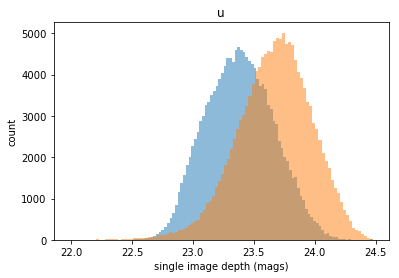

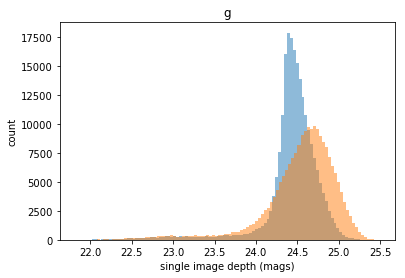

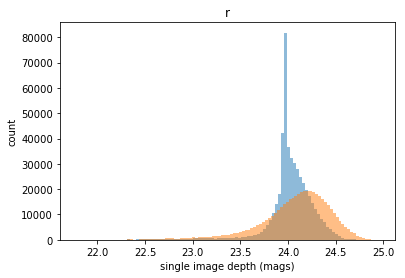

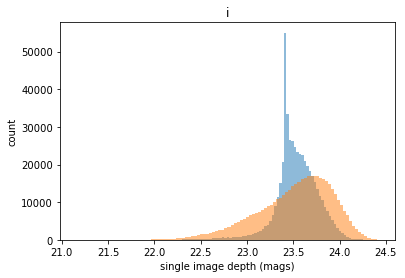

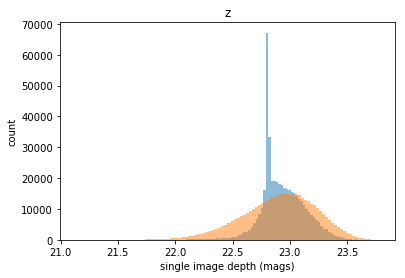

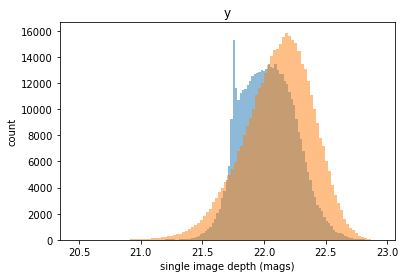

In [7]:
for filtername in filternames:
    plt.figure()
    good = np.where(data[:,2] == filtername)[0]
    ack = plt.hist(data[good,1].ravel(), bins=100, label='variable', alpha=0.5)
    good = np.where(data2[:,2] == filtername)[0]
    ack = plt.hist(data2[good,1].ravel(), bins=100, label='30s', alpha=.5)
    plt.xlabel('single image depth (mags)')
    plt.ylabel('count')
    plt.title(filtername)
    #plt.savefig('plots/%s_depths.pdf' %filtername)

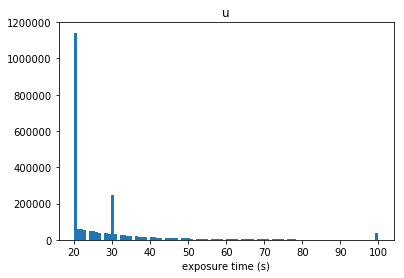

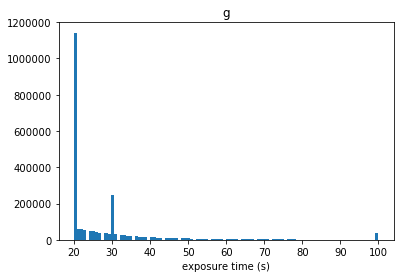

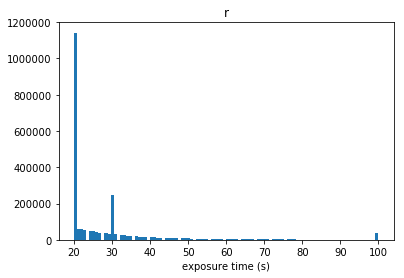

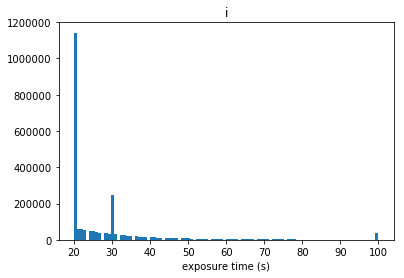

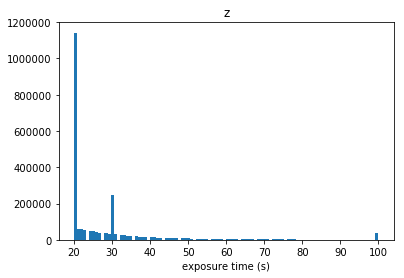

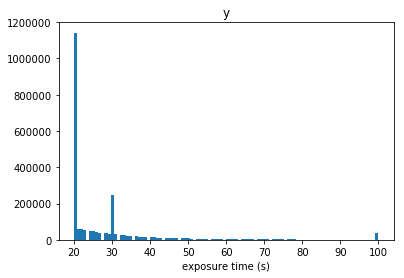

In [8]:
# Let's look at the exposure time distribution per filter
for filtername in filternames:
    plt.figure()
    good = np.where(data[:,2] == filtername)[0]
    ack = plt.hist(data[:,0].ravel(), bins=100)
    plt.title(filtername)
    plt.xlabel('exposure time (s)')